# Hausaufgabe 4
## Schallerzeugung durch einen umströmten Zylinder (Teil 1)
<!-- Lizensiert unter (CC BY 2.0) Gert Herold, 2019 -->

Bei der Umströmung eines zylindrischen Körpers bilden sich hinter diesem häufig [Wirbelstraßen](https://de.wikipedia.org/wiki/K%C3%A1rm%C3%A1nsche_Wirbelstra%C3%9Fe) aus.
Je nach Medium, Strömungsgeschwindigkeit und Durchmesser des Zylinders können die gegenläufigen Wirbel wahrnehmbare Töne verursachen.

Hier soll basierend auf experimentellen Daten untersucht werden, wie die erzeugten Töne von der Strömungsgeschwindigkeit abhängen.
In einem Windkanal wurden zu diesem Zweck die Schallabstrahlung eines Zylinder mit 6 mm Durchmesser bei 13 verschiedenen Geschwindigkeiten zwischen ca. $8$ und $50\,\frac{\text{m}}{\text{s}}$   gemessen und das Ergebnis in WAV-Dateien abgespeichert.

**1) Laden Sie die Zeitdaten aus den WAV-Dateien und extrahieren Sie die jeweils zugehörige Strömungsgeschwindigkeit in $\frac{\text{m}}{\text{s}}$ automatisiert aus den Dateinamen. Plotten Sie die Daten für alle Geschwindigkeiten mit korrekten [x-Achsenbeschriftung](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html) und [Kenn](https://stackoverflow.com/questions/25239933/how-to-add-title-to-subplots-in-matplotlib)[zeichung](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html#matplotlib.pyplot.text) der Geschwindigkeit in getrennt [untereinanderliegenden](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html) Diagrammen.**

*Hinweis: Die WAV-Daten sind als Integer-Werte gespeichert. Um daraus z.B. Schalldrücke zu berechnen, müsste bekannt sein, welchem Schalldruckwert der maximale Integerwert entspricht. In dieser Aufgabe sind jedoch diesbezüglich nur Relativ-Werte von Interesse, sodass auf eine entsprechende Umrechnung verzichtet werden kann.*

In [17]:
import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import glob     

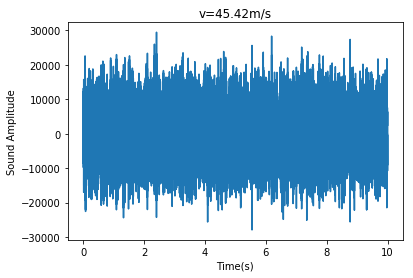

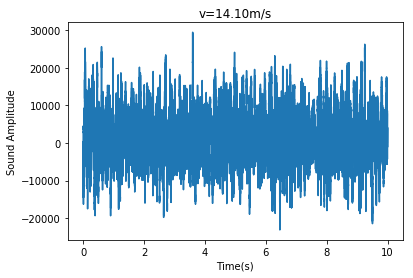

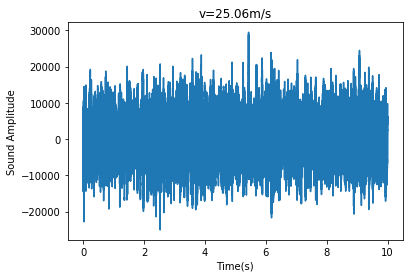

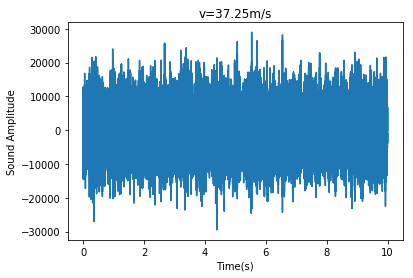

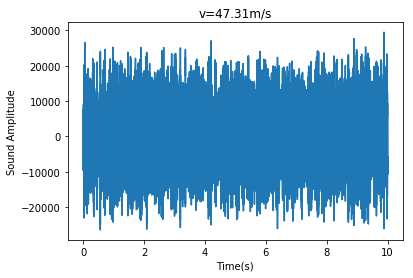

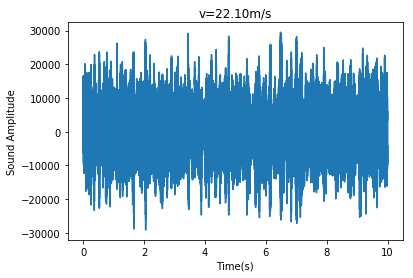

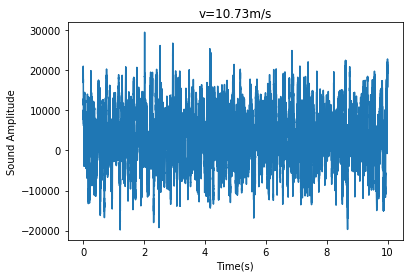

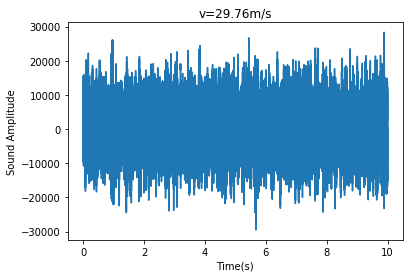

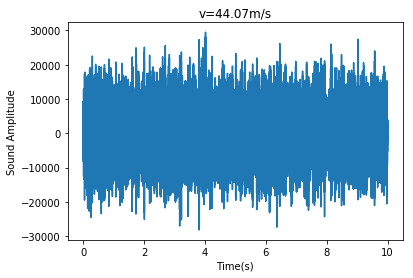

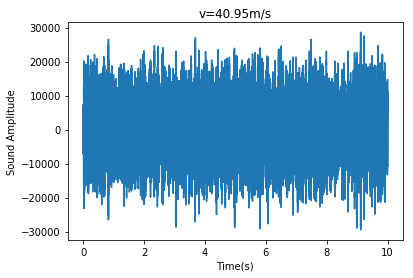

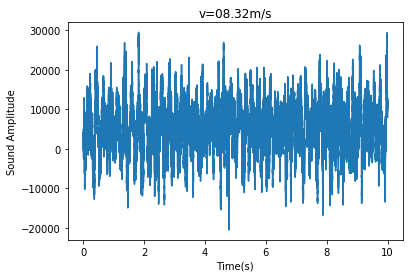

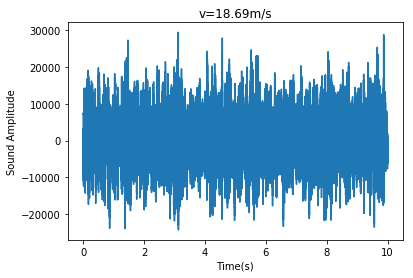

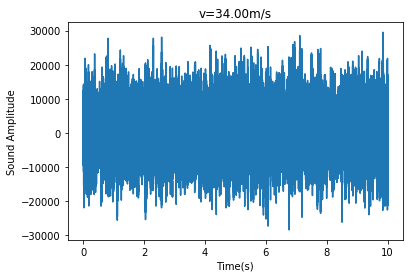

In [18]:
audio_files=glob.glob( "./*.wav")

for file in range(len(audio_files)):
    sfreq ,audio = read(audio_files[file])   
    time = np.arange(0,len(audio))/sfreq                #Abtastrate sowie Anzahl der Samples 
    
    
    fig,ax = plt.subplots() ##
    ax.title.set_text ("v="+audio_files[file].split('_')[2].replace("o",".")+"m/s")
    ax.plot(time, audio)
    ax.set(xlabel="Time(s)",ylabel="Sound Amplitude")
    plt.show()
    
#print(audio_files)
#print(fig)

Um aus den Zeitdaten Informationen über die darin enthaltenen Töne zu ermitteln, ist es sinnvoll, aus den Datensätzen jeweils ein Spektrum zu berechnen. 
Dies geschieht allgemein über eine [Fourier-Transformation](https://de.wikipedia.org/wiki/Fourier-Transformation) bzw. für diskret abgetastete Werte mittels einer [Diskreten Fourier-Transformation](https://de.wikipedia.org/wiki/Diskrete_Fourier-Transformation) (DFT). Für reellwertige Signale ist diese z.B. im Modul [*numpy.fft*](https://docs.scipy.org/doc/numpy/reference/routines.fft.html) mit der Funktion [*rfft()*](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.rfft.html) implementiert.

**2) Berechnen Sie die Spektren (Amplitudenquadrat über Frequenz) aller Zeitsignale und stellen Sie sie in einem gemeinsamen Diagramm dar:**

  * Berechnen Sie das Betragsquadrat für die einzelnen Werte.
  * Stellen Sie diese nur für Frequenzen [bis](https://docs.scipy.org/doc/numpy/reference/generated/numpy.searchsorted.html) 2500 Hz dar. Beschriften Sie die x-Achse korrekt.
  * Um den ggf. verdeckten Verlauf einiger Spektren sichtbar zu machen, setzen Sie den Parameter *alpha* der Plotfunktion auf einen Wert kleiner als 1.
  * Wählen Sie eine ausreichende Größe der Abbildung.
  * Stellen Sie die y-Achse mit logarithmischer Skalierung dar.
  * Fügen Sie der Abbildung eine Legende hinzu, damit die jeweiligen Spektren zuordenbar sind.
  
*Hinweis: Die zugehörigen Frequenzen lassen sich mithilfe der Funktion [rfftfreq()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.rfftfreq.html) berechnen. 
Anzahl der Samples sowie Abtastrate sind bereits aus Aufgabenteil 1 bekannt.*

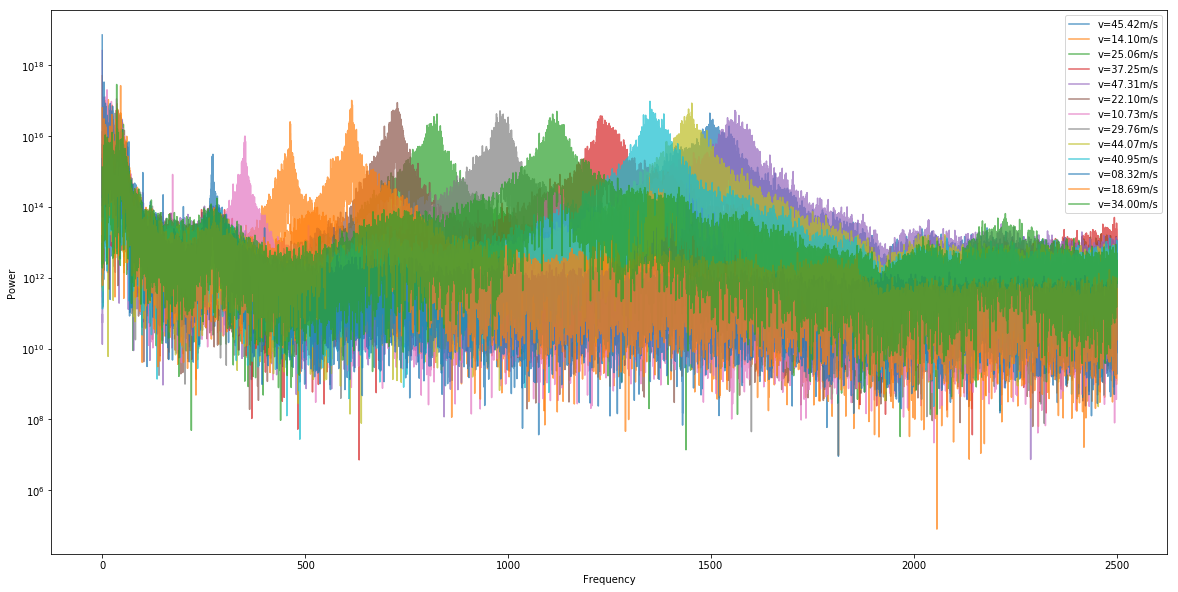

In [19]:
for file in range(len(audio_files)):
    sfreq ,audio = read(audio_files[file]) 
    audio1=np.abs(np.fft.rfft(audio))**2 ##??
    freqs=np.fft.rfftfreq(len(audio), d=1./sfreq)
    
    plt.figure(1,(20,10))
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    
    plt.semilogy(freqs[0:np.searchsorted(freqs,2500)],audio1[0:np.searchsorted(freqs,2500)],label=("v="+audio_files[file].split('_')[2].replace("o",".")+"m/s"),alpha=0.7)
    #plt.plot(freqs[0:np.searchsorted(freqs,2500)],np.log10(audio1)[0:np.searchsorted(freqs,2500)],label=("v="+audio_files[file].split('_')[2].replace("o",".")+"m/s"),alpha=0.7)
   
    plt.legend()
    


**3) Finden Sie für jede Strömungsgeschwindigkeit den jeweils markanten Ton (d.h. den Maximalwert im Spektrum).**
  * Vernachlässigen Sie in Ihrer Betrachtung Frequenzen unter 100 Hz.
  * Geben Sie die charakteristische Frequenz $f$ für jede Geschwindigkeit $v$ aus.

In [22]:
v=[]
f=[]
for file in range(len(audio_files)):
    sfreq ,audio = read(audio_files[file]) 
    audio1=np.abs(np.fft.rfft(audio))**2
    freqs=np.fft.rfftfreq(len(audio), d=1./sfreq)
    
    
    v.append(float(audio_files[file].split('_')[2].replace("o",".")))
    freqs100=np.searchsorted(freqs,100)
    freqs2500=np.searchsorted(freqs,2500)
    #f.append(freqs[np.argmax(audio1[freqs100:])]+100)
    f.append(freqs[np.argmax(audio1[freqs100:freqs2500])]+100)
f,v

([1497.1000000000001,
  463.0,
  825.0,
  1227.6000000000001,
  1559.2,
  727.2,
  351.70000000000005,
  980.2,
  1452.6000000000001,
  1349.7,
  272.8,
  614.7,
  1120.1],
 [45.42,
  14.1,
  25.06,
  37.25,
  47.31,
  22.1,
  10.73,
  29.76,
  44.07,
  40.95,
  8.32,
  18.69,
  34.0])

Es soll angenommmen werden, dass ein annähernd linearer Zusammenhang der beiden Größen $v$ und $f$ besteht. 
Um diesen zu ermitteln, soll daher eine [Regressionsgerade](https://de.wikipedia.org/wiki/Lineare_Einfachregression) berechnet werden.
Eine Gerade im zweidimensionalen Raum ist definiert durch 2 Parameter $a, b$:
$$
f = a\,v + b
$$

Die Koeffizienten $a$ und $b$ der Regressionsgerade berechnen sich über:

$$
a=\frac{\sum_{i=1}^{N} (v_i - \overline v)(f_i - \overline f)}{\sum_{i=1}^{N}(v_i - \overline v)^2}\\
b=\overline f - a\,\overline v
$$

**4) Schreiben Sie eine Funktion *ab()*, die für beliebige, gleich lange Arrays *v* und *f* die Geraden-Parameter *a* und *b* berechnet und zurückgibt.**

In [23]:
def ab(v,f):
    f_mean=np.mean(f)
    v_mean=np.mean(v)
    a_molecule=0.0
    a_Denominator=0.0
    for i in range(len(v)):
        a_molecule+=(v[i]-v_mean)*(f[i]-f_mean)
        a_Denominator+=((v[i]-v_mean)**2)
        
        a=a_molecule/ a_Denominator
        b=f_mean-a*v_mean
        return a,b


**5) Wenden Sie die Funktion auf die Wertepaare aus Aufgabenteil 3 an und zeichnen Sie die Regressionsgerade (als Linie) zusammen mit den Ausgangswerten (als Punkte) in ein Diagramm.**
  * Achten Sie auf korrekte Achsenbeschriftungen.
  * Geben Sie außerdem an, welche charakteristischen Töne bei $v=15\,\frac{\text{m}}{\text{s}}$, $v=42\,\frac{\text{m}}{\text{s}}$ und $v=50\,\frac{\text{m}}{\text{s}}$ zu erwarten wären.
  * Zeichnen Sie die Abweichung der gemessenen Werte zur Regressionsgerade in ein separates Diagramm.
  * Wie groß sind Mittelwert und Standardabweichung dieser Abweichungen?

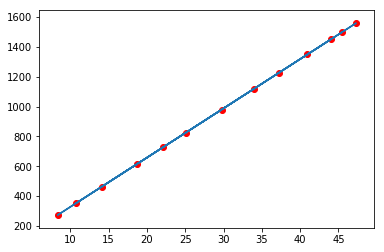

In [24]:
f_r=ab(v,f)[0]*np.array(v)+ab(v,f)[1]

plt.plot(v,f_r)
plt.scatter(v,f,c='r')

In [25]:
v_1=[15,42,50]
fc=[]
for i in range(len(v_1)):
    fc=ab(v,f)[0]*np.array(v_1)+ab(v,f)[1]
fc

array([ 492.91105783, 1384.20301834, 1648.28952515])

([8.32,
  10.73,
  14.1,
  18.69,
  22.1,
  25.06,
  29.76,
  34.0,
  37.25,
  40.95,
  44.07,
  45.42,
  47.31],
 [272.8,
  351.70000000000005,
  463.0,
  614.7,
  727.2,
  825.0,
  980.2,
  1120.1,
  1227.6000000000001,
  1349.7,
  1452.6000000000001,
  1497.1000000000001,
  1559.2],
 array([ 272.39882464,  351.95488481,  463.20132581,  614.7209591 ,
         727.28783263,  824.99984015,  980.15066291, 1120.11651152,
        1227.40165491, 1349.54166432, 1452.53540197, 1497.1       ,
        1559.49043724]),
 array([-4.01175364e-01,  2.54884814e-01,  2.01325811e-01,  2.09590973e-02,
         8.78326281e-02, -1.59849553e-04, -4.93370945e-02,  1.65115186e-02,
        -1.98345087e-01, -1.58335684e-01, -6.45980254e-02,  2.27373675e-13,
         2.90437236e-01]))

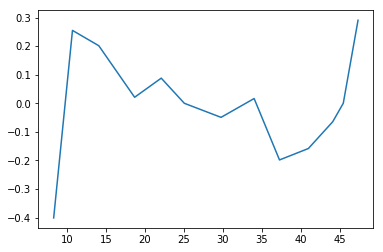

In [28]:
f_r.sort()
#index = np.argsort(f)
f.sort()
v.sort()
#print(index,f)

#f = np.array(f)[index]
#v=np.array(v)[index]
#f_r=np.array(f_r)[index]
e=f_r-f #Abweichung 
#plt.scatter(v,e)
plt.plot(v,e)
#v,f,f_r,e

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


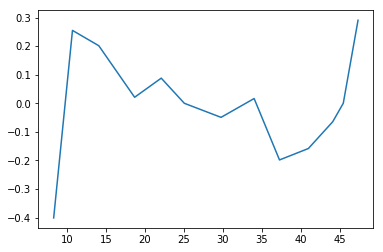

In [30]:
index = np.argsort(f)
f1= np.array(f)[index]
v1=np.array(v)[index]
f_r1=np.array(f_r)[index]
e1=f_r1-f1

plt.plot(v1,e1)

In [52]:
np.mean(e)    #Mittelwert

2.142559633984302e-13

In [53]:
np.std(e,ddof=1)   #Standardabweichung

0.18934939876810322

In [15]:
np.savetxt('d=6mm.csv',f , fmt='%3.3f', delimiter=',', header='d=6mm')